In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
df=pd.read_csv('/kaggle/input/ai-201-b-minor-mse-1/train_data.csv')

In [4]:
df.head()

,Machine_Speed_Deviation,Pressure_Level_Deviation,Temperature_Deviation,Product_Strength_Deviation
0,-2.111,0.929,-0.119,-232.9
1,-2.324,-0.352,-1.790,NaN
2,-0.141,0.343,0.054,-14.3
3,0.693,1.124,1.308,217.3
4,0.127,-0.121,0.977,21.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Machine_Speed_Deviation     459 non-null    float64
 1   Pressure_Level_Deviation    458 non-null    float64
 2   Temperature_Deviation       461 non-null    float64
 3   Product_Strength_Deviation  457 non-null    float64
dtypes: float64(4)
memory usage: 14.9 KB


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 472
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Machine_Speed_Deviation     436 non-null    float64
 1   Pressure_Level_Deviation    436 non-null    float64
 2   Temperature_Deviation       439 non-null    float64
 3   Product_Strength_Deviation  434 non-null    float64
dtypes: float64(4)
memory usage: 17.6 KB


In [8]:
df.describe()

,Machine_Speed_Deviation,Pressure_Level_Deviation,Temperature_Deviation,Product_Strength_Deviation
count,436.000000,436.000000,439.000000,434.000000
mean,0.101163,0.097411,0.248257,14.164286
std,0.994272,1.022685,0.924201,144.821915
min,-2.749000,-3.141000,-2.796000,-388.000000
25%,-0.540750,-0.616250,-0.391000,-71.625000
50%,0.092500,0.099000,0.285000,14.950000
75%,0.736000,0.784000,0.847000,109.850000
max,2.820000,3.293000,2.680000,513.800000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
z_scores = (df - df.mean()) / df.std()
df_z = df.copy()
df_z[['X1_z', 'X2_z', 'X3_z', 'y_z']] = z_scores

In [11]:
outliers = df_z[(np.abs(df_z[['X1_z','X2_z','X3_z','y_z']]) > 3).any(axis=1)]
print("Outliers based on z-score:")
print(outliers)

Outliers based on z-score:
     Machine_Speed_Deviation  Pressure_Level_Deviation  Temperature_Deviation  \
33                     2.162                     2.106                  1.642   
213                    2.690                     1.287                  1.086   
268                    0.399                     3.293                 -0.080   
436                   -0.040                     2.188                 -2.796   
446                   -0.924                    -3.141                  0.040   

     Product_Strength_Deviation      X1_z      X2_z      X3_z       y_z  
33                        513.4  2.072711  1.964036  1.508051  3.447239  
213                       513.8  2.603753  1.163203  0.906450  3.450001  
268                       296.5  0.299553  3.124707 -0.355180  1.949537  
436                         5.4 -0.141976  2.044217 -3.293934 -0.060518  
446                      -254.6 -1.031069 -3.166578 -0.225338 -1.855826  


In [12]:
df_clean = df[(np.abs(z_scores) <= 3).all(axis=1)]

In [13]:
df_clean

,Machine_Speed_Deviation,Pressure_Level_Deviation,Temperature_Deviation,Product_Strength_Deviation
0,-2.111,0.929,-0.119,-232.9
2,-0.141,0.343,0.054,-14.3
3,0.693,1.124,1.308,217.3
4,0.127,-0.121,0.977,21.8
5,-1.228,-1.860,0.309,-259.3
...,...,...,...,...
467,0.465,0.250,0.596,75.1
468,-2.454,-1.385,1.050,-379.5
469,1.417,-0.435,1.150,140.4
470,0.043,-0.264,0.250,-1.6


In [14]:
df_clean.describe()

,Machine_Speed_Deviation,Pressure_Level_Deviation,Temperature_Deviation,Product_Strength_Deviation
count,394.000000,394.000000,394.000000,394.000000
mean,0.090444,0.064406,0.249302,10.419797
std,0.985148,0.995284,0.884422,140.014281
min,-2.749000,-2.821000,-2.202000,-388.000000
25%,-0.546250,-0.647750,-0.387750,-75.700000
50%,0.085500,0.074500,0.280500,13.400000
75%,0.738000,0.757750,0.801250,109.850000
max,2.820000,2.702000,2.680000,415.300000


In [15]:
df=df_clean

In [16]:
df.describe()

,Machine_Speed_Deviation,Pressure_Level_Deviation,Temperature_Deviation,Product_Strength_Deviation
count,394.000000,394.000000,394.000000,394.000000
mean,0.090444,0.064406,0.249302,10.419797
std,0.985148,0.995284,0.884422,140.014281
min,-2.749000,-2.821000,-2.202000,-388.000000
25%,-0.546250,-0.647750,-0.387750,-75.700000
50%,0.085500,0.074500,0.280500,13.400000
75%,0.738000,0.757750,0.801250,109.850000
max,2.820000,2.702000,2.680000,415.300000


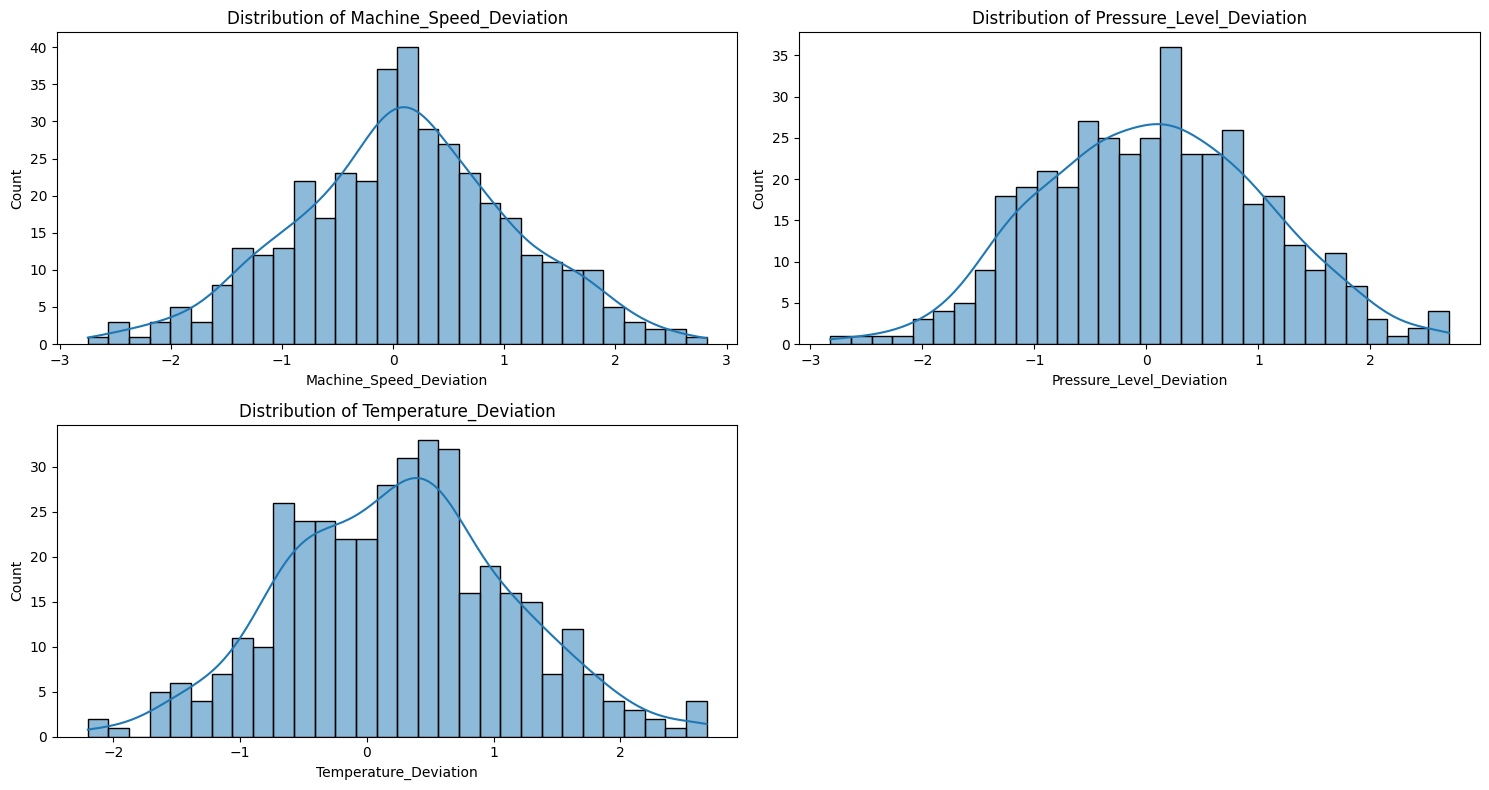

In [17]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(df.columns[:-1]):  # exclude target
    plt.subplot(2, (3+1)//2, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

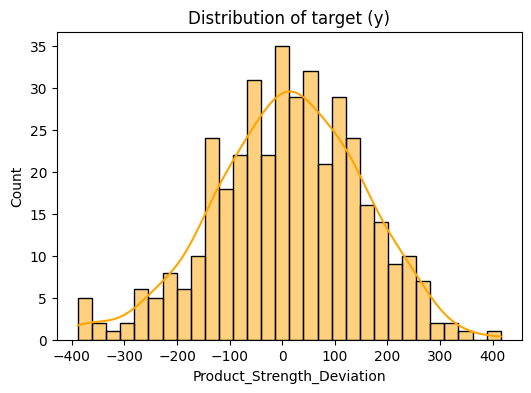

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df['Product_Strength_Deviation'], kde=True, bins=30, color='orange')
plt.title("Distribution of target (y)")
plt.show()

In [19]:
df['Machine_Speed_Deviation'] = df['Machine_Speed_Deviation'].fillna(df['Machine_Speed_Deviation'].mean())
df['Pressure_Level_Deviation'] = df['Pressure_Level_Deviation'].fillna(df['Pressure_Level_Deviation'].mean())
df['Temperature_Deviation'] = df['Temperature_Deviation'].fillna(df['Temperature_Deviation'].median())
df['Product_Strength_Deviation'] = df['Product_Strength_Deviation'].fillna(df['Product_Strength_Deviation'].mean())

In [20]:
df.describe()

,Machine_Speed_Deviation,Pressure_Level_Deviation,Temperature_Deviation,Product_Strength_Deviation
count,394.000000,394.000000,394.000000,394.000000
mean,0.090444,0.064406,0.249302,10.419797
std,0.985148,0.995284,0.884422,140.014281
min,-2.749000,-2.821000,-2.202000,-388.000000
25%,-0.546250,-0.647750,-0.387750,-75.700000
50%,0.085500,0.074500,0.280500,13.400000
75%,0.738000,0.757750,0.801250,109.850000
max,2.820000,2.702000,2.680000,415.300000


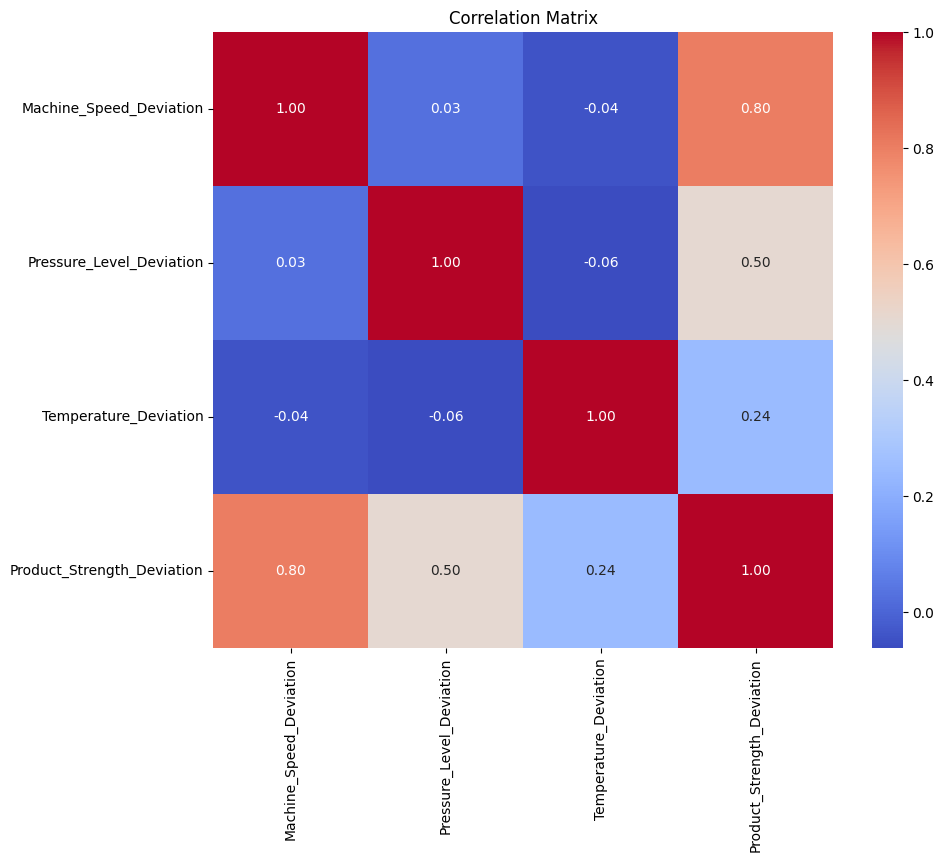

In [21]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [22]:
df.describe()

,Machine_Speed_Deviation,Pressure_Level_Deviation,Temperature_Deviation,Product_Strength_Deviation
count,394.000000,394.000000,394.000000,394.000000
mean,0.090444,0.064406,0.249302,10.419797
std,0.985148,0.995284,0.884422,140.014281
min,-2.749000,-2.821000,-2.202000,-388.000000
25%,-0.546250,-0.647750,-0.387750,-75.700000
50%,0.085500,0.074500,0.280500,13.400000
75%,0.738000,0.757750,0.801250,109.850000
max,2.820000,2.702000,2.680000,415.300000


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
X = df.drop('Product_Strength_Deviation', axis=1)
y = df['Product_Strength_Deviation']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
lr = LinearRegression()
lr.fit(X_scaled, y)
y_pred_lr = lr.predict(X_val)

print("Linear Regression R2:", r2_score(y_val, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_val, y_pred_lr))

Linear Regression R2: 0.9745853975225907
Linear Regression MSE: 600.8139884606614


In [27]:
def polynomial_regression(X_scaled, y, degree=2, test_size=0.1, random_state=42):

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X_poly, y, test_size=test_size, random_state=random_state
    )

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Polynomial Regression (degree={degree})")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")

    return model, poly, r2, mse

In [28]:
model, poly,r2, mse = polynomial_regression(X_scaled, y, degree=7)

Polynomial Regression (degree=7)
R² Score: 0.8182
MSE: 4382.6677


In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth':[2,4,6,8,10]
}

grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring='r2')
grid_dt.fit(X_scaled, y)

y_pred_dt = grid_dt.predict(X_val)
mse = mean_squared_error(y_val, y_pred_dt)
print("Decision Tree R2:", r2_score(y_val, y_pred_dt))
print("Decision Tree MSE:", mse)
print("Best DT params:", grid_dt.best_params_)

Decision Tree R2: 0.9891527505720503
Decision Tree MSE: 256.4344336460554
Best DT params: {'max_depth': 8}


In [31]:
knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3,5,7,9,11],
    'weights':['uniform','distance'],
    'p':[1,2]  # 1=Manhattan, 2=Euclidean
}

grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_knn.fit(X_train, y_train)

y_pred_knn = grid_knn.predict(X_val)
mse = mean_squared_error(y_val, y_pred_knn)
print("KNN Regression R2:", r2_score(y_val, y_pred_knn))
print("KNN Regression MSE:", mse)
print("Best KNN params:", grid_knn.best_params_)

KNN Regression R2: 0.9353215776546308
KNN Regression MSE: 1529.0304434706907
Best KNN params: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


In [32]:
df_test=pd.read_csv('/kaggle/input/ai-201-b-minor-mse-1/test_data.csv')

In [33]:
df_test.head()

,id,Machine_Speed_Deviation,Pressure_Level_Deviation,Temperature_Deviation
0,1,0.434,0.579,-0.378
1,2,0.261,0.270,-0.288
2,3,0.972,-1.180,-0.464
3,4,2.311,1.064,-0.047
4,5,0.022,0.983,-1.463


In [34]:
X_test=df_test.drop(columns=['id'])

In [35]:
X_new_poly = poly.transform(X_test)
y_new_pred = model.predict(X_new_poly)

In [36]:
new_df = pd.DataFrame({
    'id': df_test['id'],
    'Product_Strength_Deviation': y_new_pred
})


In [40]:
new_df.to_csv('sub.csv')

In [42]:
df_sub=pd.read_csv('/kaggle/working/sub.csv')
df_sub.head()

,Unnamed: 0,id,Product_Strength_Deviation
0,0,1,40.882812
1,1,2,-1.656250
2,2,3,-25.160156
3,3,4,354.429688
4,4,5,28.371094


In [38]:
new_df.head()

,id,Product_Strength_Deviation
0,1,40.882812
1,2,-1.656250
2,3,-25.160156
3,4,354.429688
4,5,28.371094
